# Data Scientist Associate Practical Exam Submission

Use this template to complete your analysis and write up your summary for submission.


## Task 1 
The dataset contains of **1500 rows and 8 columns** with missing values and other criteria that isn't followed, before the data cleaning.
All columns are validated against the criteria in the dataset table:

- booking_id: is as described, no missing values.
- months_as_member: is as described, no missing values.
- weight: has 20 missing values. The missing values are replaced by the overall average weigt.
- days_before: 25 rows have added 'days' to the number of days before, the string is removed and the dtype is converted to int dtype.
- day_of_week: has 6 rows that doesn't follow the described categories. These are replaced so that the follow the description.
- time: is as described, no missing values.
- category: has 13 rows that doesn't follow the described categories. These are replaced as unknown, according to the dataset description. 
- attended: is as described, no missing values.

After the data validation, the dataset contains **1500 rows and 8 columns**.

In [39]:
# Import numpy under its usual alias
import numpy as np
# Import Pandas under its usual alias
import pandas as pd

# Read in the fitness_class CSV as a DataFrame
gz_df = pd.read_csv('fitness_class_2212.csv')

# Printing the first five rows of the DataFrame
print(gz_df)

# Printing the data type of the columns
print(gz_df.dtypes)

      booking_id  months_as_member  weight  ... time  category attended
0              1                17   79.56  ...   PM  Strength        0
1              2                10   79.01  ...   AM      HIIT        0
2              3                16   74.53  ...   AM  Strength        0
3              4                 5   86.12  ...   AM   Cycling        0
4              5                15   69.29  ...   AM      HIIT        0
...          ...               ...     ...  ...  ...       ...      ...
1495        1496                21   79.51  ...   AM      HIIT        0
1496        1497                29   89.55  ...   AM  Strength        0
1497        1498                 9   87.38  ...   AM      HIIT        0
1498        1499                34   68.64  ...   AM      Aqua        0
1499        1500                20   94.39  ...   AM   Cycling        1

[1500 rows x 8 columns]
booking_id            int64
months_as_member      int64
weight              float64
days_before          object

In [40]:
gz_df['attended'].head()

gz_df['attended'].info()

gz_df['attended'].describe()

gz_df['attended'].isna().sum()

gz_df['attended'].value_counts()

<class 'pandas.core.series.Series'>
RangeIndex: 1500 entries, 0 to 1499
Series name: attended
Non-Null Count  Dtype
--------------  -----
1500 non-null   int64
dtypes: int64(1)
memory usage: 11.8 KB


0    1046
1     454
Name: attended, dtype: int64

In [41]:
# Replacing missing values in the weight column
gz_df['weight'] = gz_df['weight'].fillna(gz_df['weight'].mean())

# Replacing string from days_before columns
gz_df['days_before'] = gz_df['days_before'].str.replace(' days', '')

gz_df['days_before'] = gz_df['days_before'].astype('int')

# Replacing wrong values in the day_of_week colmun
gz_df['day_of_week'] = gz_df['day_of_week'].str.replace('Monday', 'Mon')
gz_df['day_of_week'] = gz_df['day_of_week'].str.replace('Wednesday', 'Wed')
gz_df['day_of_week'] = gz_df['day_of_week'].str.strip('.')

# Replacing wrong values in the category column
gz_df['category'] = gz_df['category'].replace('-', 'unknown')

## Task 2
From **Graph 1 Category Attended**, the most attended category is the HIIT-category with 213 participants, followed by Cycling with 110 participants and Strength as the third most attended category with 62 participants. The HIIT and Cycling categories are by far the two most popular categories. The HIIT-category constitute 60% of the total number of attended classes.
These information’s tells that the observations are imbalanced across the categories of the attended variable.

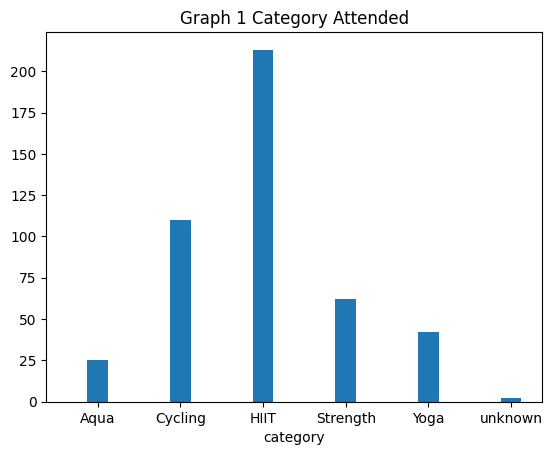

In [42]:
# import matplotlib
import matplotlib.pyplot as plt

category = gz_df.groupby(['category', 'attended'])['attended'].sum()
category = category.unstack()
#print(category)
category.plot(kind='bar', color='tab:blue', position=0.75).set(title='Graph 1 Category Attended')
plt.xticks(rotation=0)
#remove legend
plt.legend('', frameon=False)

## Task 3
From **Graph 2-1 Months as Member** we see that the distribution is right-skewed. Meaning that the majority of the data is concentrated on the left side of the graph while we see some big outliers on the right side of the graph. This is also confimed by the Kernal Density Estimation, showed by the blue line. Because of skewed data a log tranformation have been applied to the data. The result of the log transformation is seen in **Grahp 2-2** and now the data resembles a normal distribution much more.

Text(0, 0.5, 'Count')

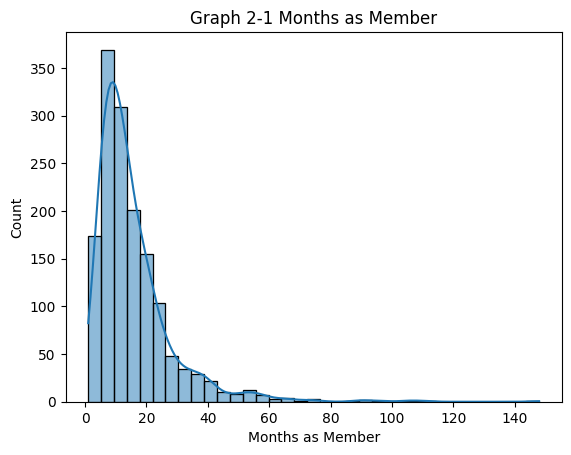

In [43]:
# import seaborn
import seaborn as sns

sns.histplot(data=gz_df, x='months_as_member', palette='Blues', bins=35, kde=True)
plt.title('Graph 2-1 Months as Member')
plt.xlabel('Months as Member')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

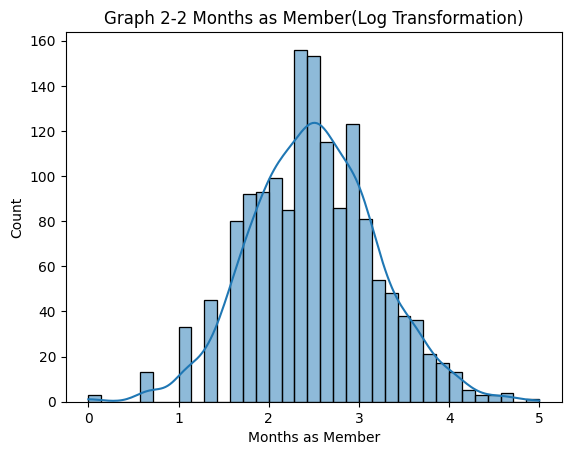

In [44]:
gz_df['log_months_as_member'] = np.log(gz_df.months_as_member)
sns.histplot(data=gz_df, x='log_months_as_member', palette='Blues', bins=35, kde=True)
plt.title('Graph 2-2 Months as Member(Log Transformation)')
plt.xlabel('Months as Member')
plt.ylabel('Count')

## Task 4
From **Graph 3-1 Attendance vs Months as Member** we can see that we find the most active members around those who have been members from 10 to 30 months, after that the members get less and less active, the longer they have been members.
Let's compare these findings with the findings of **Graph 2-1 Months as Member**, because when we do that then the results also makes sense. From **Graph 2-1 Months as Member** we know that the highest concentration of members is between 5 and 13 months. From 13 months of membership the numbers of members just falls until we reach 40 months of membership, from here there is very few members. 

When taking a look at **Graph 3-2 Attendance vs Months as Member** we see that the members not attending the classes have been members for the same amount of time as the majority of the members who are attending the classes. This graph also shows that when a person has been a member for more than 60 months, then they are always attending the classes they signed up for.

Text(13.819444444444445, 0.5, 'Attendance')

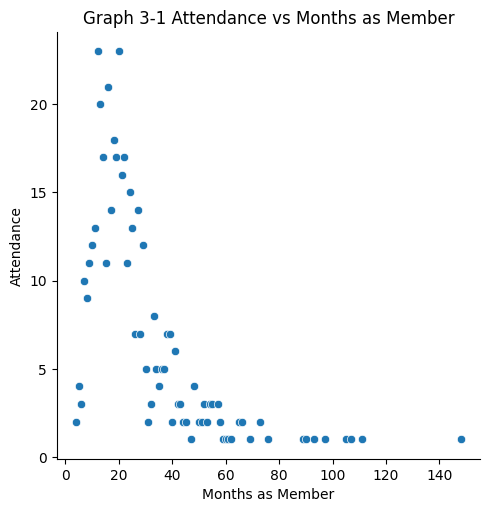

In [45]:
attendance = pd.DataFrame(gz_df.groupby('months_as_member')['attended'].sum())
attendance.reset_index(inplace=True)
attendance = attendance.iloc[3:, :]
sns.color_palette('flare')
sns.relplot(data=attendance, x='months_as_member', y='attended')
plt.title('Graph 3-1 Attendance vs Months as Member')
plt.xlabel('Months as Member')
plt.ylabel('Attendance')

Text(38.840408950617274, 0.5, 'Attendance')

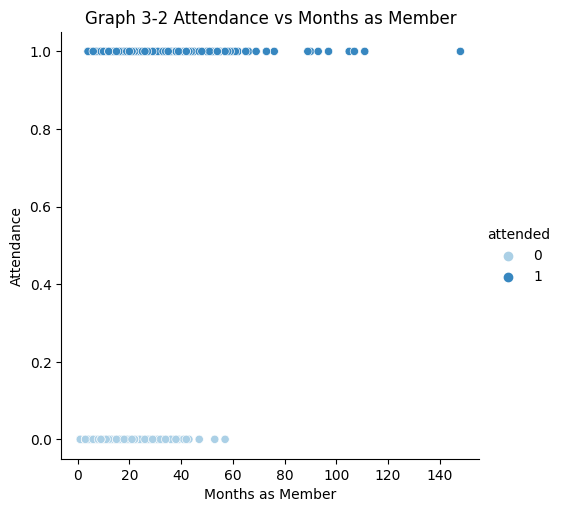

In [46]:
sns.relplot(data=gz_df, x='months_as_member', y='attended', hue='attended', palette='Blues')
plt.title('Graph 3-2 Attendance vs Months as Member')
plt.xlabel('Months as Member')
plt.ylabel('Attendance')

## Task 5
In this assignment we are asked to predict whether a member will attend in the class they signed up for. In other words, we are trying to predict a discrete binary value, therefore we are dealing with a **classification problem**.

In [47]:
# Import ML models and performance metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

0       3
1       1
2       7
3       5
4       4
       ..
1495    5
1496    1
1497    2
1498    7
1499    4
Name: day_of_week, Length: 1500, dtype: int64


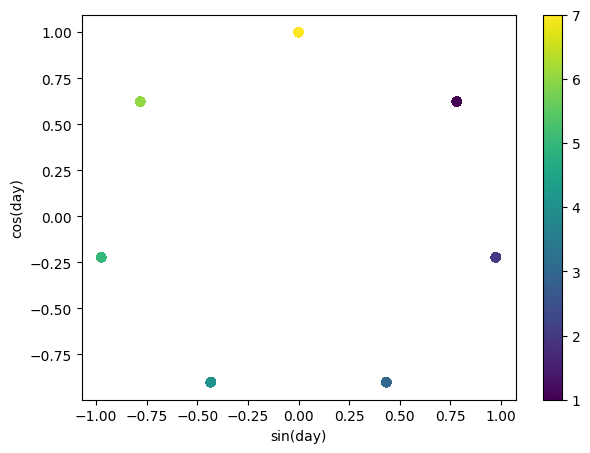

In [48]:
gz_df['day_of_week'] = gz_df['day_of_week'].replace(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], [1,2,3,4,5,6,7])

gz_df['sin_day'] = np.sin(2 * np.pi * gz_df['day_of_week'] / max(gz_df['day_of_week']))
gz_df['cos_day'] = np.cos(2 * np.pi * gz_df['day_of_week'] / max(gz_df['day_of_week']))

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7, 5))
sp = ax.scatter(gz_df["sin_day"], gz_df["cos_day"], c=gz_df["day_of_week"])
ax.set(
    xlabel="sin(day)",
    ylabel="cos(day)",
)
_ = fig.colorbar(sp)
print(gz_df['day_of_week'])

**Changes made to enable modeling**
The following changes have been made to enable model fitting.
- The values in the **Time** column are converted to binary values.
- The values in the **category** column are converted according their most frequent values.
- The **day of week** column is droped, instead two new columns **(sin_day & cos_day)** are added with cyclical values of the week days. 
- Apply log transformation to the months_as_member column.

In [49]:
# converting the time column to binary values
gz_df['time'] = gz_df['time'].replace('AM', 1)
gz_df['time'] = gz_df['time'].replace('PM', 0)

# converting the category column to there fequrent values
fe = gz_df.groupby('category').size()
fe_ = fe/len(gz_df['category'])
gz_df['category'] = gz_df['category'].map(fe_).round(3)

# converting the day of week column to its cyclical values
gz_df['day_of_week'] = gz_df['day_of_week'].replace(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], [1,2,3,4,5,6,7])

gz_df['sin_day'] = np.sin(2 * np.pi * gz_df['day_of_week'] / max(gz_df['day_of_week']))
gz_df['cos_day'] = np.cos(2 * np.pi * gz_df['day_of_week'] / max(gz_df['day_of_week']))

# print the dtypes
print(gz_df.dtypes)

# drop the day_of_week column
gz_df = gz_df.drop(columns=['day_of_week', 'months_as_member'])

# print column names
print(gz_df.columns)

booking_id                int64
months_as_member          int64
weight                  float64
days_before               int64
day_of_week               int64
time                      int64
category                float64
attended                  int64
log_months_as_member    float64
sin_day                 float64
cos_day                 float64
dtype: object
Index(['booking_id', 'weight', 'days_before', 'time', 'category', 'attended',
       'log_months_as_member', 'sin_day', 'cos_day'],
      dtype='object')


In [50]:
# Creating the X and y variables
X = gz_df.drop(['attended'], axis=1)
y = gz_df['attended']

# Split the data into 70% training set and 30% testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

(1050, 8) (450, 8) (1050,) (450,)


## Task 6
Baseline Model - Support Vector Model

In [51]:
# Creating the Support Vector Model
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

## Task 7
Comparison Model – Logistic Regression

In [52]:
# Creating the K-Nearst Neighbors Model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

## Task 8
For the baseline model a **Support Vector Machine** is chosen. The reason behind that choice is that SVMs are designed for binary classification as we are working with in this case. Another reason is that the SVM algorithm is what we call an eager learner, which means that before making the predictions, the model spend a lot of time on training the model. For the comparison model the **K-Nearest Neighbors model** is chosen. The KNN is also known for making good results on binary classification problems. Another reason is that the KNN opposite the SVM is a lazy learner, which means that is spend less time on the training model before making a prediction. Another reason why these two models are chosen is that it's interesting to see if there is a big difference in using an eager learner vs a lazy learner.

## Task 9
To evaluate the two models the **Accuracy Score Metric** is chosen. This metric is chosen because it is easy to implement, and it gives a result that is easy to understand. More important is also one of the most commonly used measures to evaluate binary classification models.

In [53]:
# Evaluating the SVM-model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'The SVM classifier achieved {round(accuracy_svm*100, 1)}% accuracy.')

The SVM classifier achieved 74.2% accuracy.


In [54]:
# Evaluating the KNN-model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'The KNN classifier achieved {round(accuracy_knn*100, 1)}% accuracy.')

The KNN classifier achieved 72.0% accuracy.


## Task 10
The SVM-model is scoring a higher accuracy then the KNN-model, with 74.2% vs. 72.0%. When using the **accuracy score** as the evaluation metric, then best performing model is the one with the highest score, in this case the **Support Vector Machine**. This mean that for the future work we will stay with the **Support Vector Machine** and try to improve its performance.